# Project Candidate 1

## 1. Fourier Transformation

### import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Allowed module : numpy, matplotlib, pandas, gurobi, scipy, seaborn

### utils

In [2]:
def imshow(image: np.ndarray, title: str, grayscale: bool = False):
    plt.title(title)
    if grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()

### Load the image. Convert to grayscale.

In [3]:
img = imread("./Boneyard_IMG_5341.jpg")

datatype : <class 'numpy.ndarray'>
   shape : (3598, 5397, 3)      # H × W × C


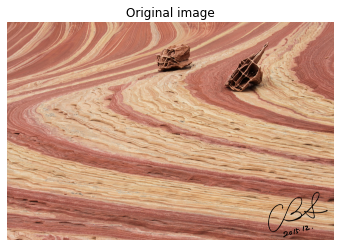

In [4]:
print(f"datatype : {type(img)}")
print(f"   shape : {img.shape}      # H × W × C")

imshow(img, "Original image")

datatype : <class 'numpy.ndarray'>
   shape : (3598, 5397)      # H × W


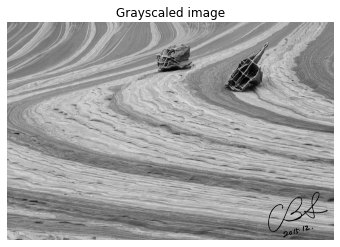

In [5]:
gimg = np.mean(img, axis=-1)

print(f"datatype : {type(gimg)}")
print(f"   shape : {gimg.shape}      # H × W")

imshow(gimg, "Grayscaled image", grayscale=True)

### Compression using Fourier Transformation

In [6]:
def fft_compression(grayscale_image: np.ndarray, compression_rate: float) -> np.ndarray:
    # Fourier Transformation
    gimg_fft = np.fft.fft2(grayscale_image)
    # Compression
    gimg_fft_sorted = np.sort(np.abs(gimg_fft.reshape(-1)))
    threshold_idx = (1-compression_rate) * len(gimg_fft_sorted)
    threshold_idx = int(np.floor(threshold_idx))
    threshold = gimg_fft_sorted[threshold_idx]
    compression_mask = np.abs(gimg_fft) > threshold
    compressed_gimg_fft = gimg_fft * compression_mask
    # Inverse Fourier Transformation
    compressed_gimg_fft = gimg_fft * compression_mask
    compressed_gimg = np.fft.ifft2(compressed_gimg_fft).real
    return compressed_gimg

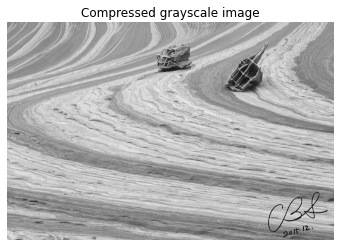

In [7]:
compressed_gimg = fft_compression(grayscale_image=gimg, compression_rate=0.05)
imshow(compressed_gimg, "Compressed grayscale image", True)

### Save the compressed image. Violate the module limitation.

In [14]:
# 잘 안되네...

# from PIL import Image
# Image.fromarray(compressed_gimg, mode='L').save("fft_compressed05.jpg")